# ML System Design: Large Language Models and Retrieval Augmented Generation (RAG)

## Overview of the Class
In this session, we discussed the structural concepts underlying large language models (LLMs) and the implementation of a Retrieval-Augmented Generation (RAG) system. We revisited essential components of Machine Learning (ML) system design, including the following:
- Introduction to large language models
- Transformers and self-attention mechanisms
- Training methodologies (Pre-training and Fine-tuning)
- Retrieval-Augmented Generation (RAG)
- Practical implementation using Google Gemini API

## What are Large Language Models (LLMs)?
LLMs are sophisticated AI models specifically designed to understand and generate human language. Here are some key characteristics:
- **Nature**: They generate text given a prompt, responding based on patterns learned from vast datasets.
- **Dataset Composition**: The datasets come from multiple sources, including:
  - Web pages
  - Books
  - Wikipedia
  - Code repositories (e.g., GitHub)

## Applications of LLMs
LLMs are employed for numerous natural language tasks:
1. **Text Generation**: Creating original text based on a prompt.
2. **Summarization**: Condensing articles or documents into brief summaries.
3. **Translation**: Translating text from one language to another.
4. **Question Answering**: Providing answers to questions based on inputs.
5. **Code Generation**: Writing snippets of code based on programming requirements.

### Examples of LLMs
1. **OpenAI GPT Series**: GPT-2, GPT-3, and GPT-4
2. **Google Models**: Lambda, Palm, Gemini
3. **Meta's Llama Series**: Llama 1 and 2

## Transformer Architecture
The backbone of most LLMs is derived from the Transformer architecture introduced in the paper "Attention is All You Need" (Vaswani et al., 2017). The key components are as follows:

### Key Components
1. **Embedding Layer**: Converts input tokens into numerical format (vectors).
2. **Positional Encoding**: Adds information about the order of words in a sentence.
3. **Self-Attention Layer**: Determines the importance of each word relative to others. Multi-head attention is often utilized to attend to multiple parts of a sequence.
4. **Feedforward Neural Network**: Further processes information.
5. **Decoder Layer**: Converts encoded information back into human-readable format outputs.

### Self-Attention Mechanism
Self-attention allows the model to weigh the significance of different words in relation to each other. This is pivotal for understanding context. For example, in the sentence "The cat sat on the mat. It was dirty," "it" could refer to "the mat" or "the cat." The self-attention layer resolves these relationships effectively.

```mermaid
graph TD;
    A[Input Sentence] --> B[Tokenization]
    B --> C[Word Embedding]
    C --> D[Positional Encoding]
    D --> E[Self-Attention Layer]
    E --> F[Feedforward Network]
    F --> G[Output Layer]
```

## How are LLMs Trained?
LLMs undergo a two-step training process:
1. **Pre-training**: Involves unsupervised learning from extensive datasets to learn grammar, facts, and language context.
   - **Self-supervised learning**: Predicting the next token in a sequence without labeled data.
2. **Fine-tuning**: Involves supervised learning on smaller, task-specific datasets to adapt the model to specific applications or align output with human feedback.

### Limitations of LLMs
- **Knowledge Cut-off**: Models only know information up to a certain date.
- **Hallucinations**: Models can generate incorrect or nonsensical responses.
- **Context Window**: There are limits to how much input text the model can process.
- **Bias**: Models may inherit biases present in training data.

## What is Retrieval-Augmented Generation (RAG)?
RAG is a method designed to enhance the capabilities of LLMs by allowing them to access additional contextual information at inference time, addressing issues like knowledge cut-off and hallucinations. Key features include:
- Searching external knowledge bases for relevant information.
- Combining retrieved information with LLM responses for accurate outputs.

### RAG Process Steps
1. **User Query**: The user submits a question or request.
2. **Information Retrieval**: The system searches external knowledge bases for relevant text chunks.
3. **Augmentation**: Combines retrieved chunks with the original user query into a standardized prompt format.
4. **Response Generation**: The LLM generates a response using the augmented prompt.

```mermaid
flowchart TD;
    A[User Query] --> B[Search Knowledge Base]
    B --> C[Retrieve Relevant Chunks]
    C --> D[Create Augmented Prompt]
    D --> E[Generate Response with LLM]
    E --> F[Return Final Output]
```

## Practical Implementation with Google Gemini API
### Code for Setting Up RAG
1. **API Key Configuration**: Generate an API key => You will create a secret to securely store it.
2. **Loading Models and Embeddings**: Utilize the Gemini API to load your embedding models by following the designated structure.

Here’s a basic structure for your implementation:
```python
from google.genai import UserSecretClient

# Step 1: Initialize secrets client
secrets_client = UserSecretClient()
api_key = secrets_client.get_secret("Google Gemini API Key")

# Step 2: Install necessary libraries
!pip install chromadb google-genai

# Step 3: Document Chunking and Embedding
# Assuming documents are loaded as list "documents"
embeddings = [process_document(doc) for doc in documents]  # Replace with your embedding function
```

## What is Retrieval-Augmented Generation (RAG)?
RAG systems enhance the capabilities of traditional large language models by allowing them to access dynamic, external information to supplement their responses. This effectively mitigates issues related to knowledge cut-off periods and the potential for generating hallucinated, inaccurate responses.

### Importance of RAG
- **Factual Accuracy**: By retrieving real-time data, RAG systems provide answers grounded in current information, significantly improving the factual accuracy of model responses.
- **Dynamic Knowledge**: RAG systems can integrate new documents into their knowledge base without needing full model retraining.
- **Improved Context**: They can provide more relevant output by incorporating contextual information that was not in the initial training dataset.

### Structure of a RAG System
A typical RAG system can be broken down into key components:
1. **User Input**: The user submits a query.
2. **Document Retrieval**: The system searches through a knowledge base to find relevant document chunks.
3. **Chunk Processing**: Retrieved document chunks are combined with the original query.
4. **Augmented Prompt**: The system sends the augmented prompt to an LLM for generating a coherent response.
5. **Result Output**: The processed information is returned to the user.

### Mermaid Diagram of RAG Workflow
```mermaid
graph TB;
    A[User Input] --> B[Document Retrieval]
    B --> C[Chunk Processing]
    C --> D[Create Augmented Prompt]
    D --> E[LLM Response Generation]
    E --> F[Result Output]
```

## Key Steps in Implementing a RAG System
### 1. Chunking
This involves breaking large documents into smaller, manageable units. Effective chunking maintains context by allowing overlapping segments.
- **Example**: If a document is 1000 words long, it might be chunked into five 200-word sections, possibly overlapping by a few sentences to ensure context preservation.

### 2. Embedding Generation
Each chunk is converted into a vector representation using embedding models. This transforms text into a numerical format suitable for similarity calculations and retrieval processes.
- **Traditional Models**: Glove, Word2Vec
- **Modern Models**: BERT, Sentence Transformers

### 3. Storing Embeddings
After generating embeddings, they must be stored in a vector database designed for efficient searching. Examples of popular vector databases include:
- **ChromaDB**: A robust option for document storage and retrieval.
- **FAISS**: Facebook's AI Similarity Search, optimized for large datasets.

### 4. Query Processing
When a user submits a query:
- The query is transformed into an embedding.
- A similarity search is performed in the vector database to retrieve the most relevant document chunks using cosine similarity or Euclidean distance.

### 5. Formulating the Augmented Prompt
Combine the query and retrieved chunks into an augmented prompt. This prompt is sent to the LLM, which generates a nuanced response.
- **Example**:
  ```plaintext
  You are an informative assistant.
  Answer the following question based on the document provided.
  Question: "What features does the touchscreen have?"
  Document: "The touchscreen allows for multi-touch, gesture recognition, and adaptability in various environments."
  ```

## Practical Implementation: Step-by-Step Guide
### Setting Up the Environment
You will start by installing the required libraries and setting up your API key.

```python
# Install necessary libraries
!pip install chromadb google-genai
```

### Importing Required Packages
```python
from google.genai import UserSecretClient
import chromadb
# Initialize secrets client
client = UserSecretClient()
api_key = client.get_secret("Google Gemini API Key")
```

### Document Chunking and Embedding Generation
```python
# Assuming documents are loaded in a list called "documents"
def generate_embeddings(documents):
    embeddings = []
    for doc in documents:
        # Call the embedding model (Example is illustrative)
        embedding = client.model.embed(doc)  
        embeddings.append(embedding)
    return embeddings

document_vectors = generate_embeddings(documents)
```

### Storing Embeddings in ChromaDB
```python
# Initialize ChromaDB
db = chromadb.Client()
collection = db.create_collection('document_embeddings')

# Add embeddings to the collection
for vector in document_vectors:
    collection.add(vector)
```

### Executing Queries
```python
# Define the user query
query = "What are the features of the touchscreen?"
query_embedding = client.model.embed(query)

# Retrieve the most relevant chunks
results = collection.query(query_embedding, n_results=5)  # Get top 5 results

# Create an augmented prompt based on the retrieved results
augmented_prompt = f"You are a helpful assistant. Answer based on the following documents: {results}. Question: {query}"

# Get the LLM response
response = client.model.generate(augmented_prompt)
print(response)
```
## Advanced Components of RAG Systems

### Embedding Models Overview
Embedding models are crucial for converting textual data into vector representations that capture semantic meanings. Here are some commonly used models:

1. **Word2Vec**:
   - Developed by Google, Word2Vec relies on shallow neural networks.
   - **Skip-gram and CBOW** (Continuous Bag of Words) are the two architectures used.
   - Primarily focuses on word-level context but lacks the ability to understand more complex language structures.

2. **GloVe (Global Vectors for Word Representation)**:
   - Developed by Stanford, GloVe leverages global statistical information to understand word relationships.
   - Generates dense word vectors but is primarily statistical and does not capture context as effectively as modern transformer-based models.

3. **BERT (Bidirectional Encoder Representations from Transformers)**:
   - A deep learning model developed by Google.
   - It reads text input bidirectionally, understanding context based on both left and right words.
   - Highly effective for various NLP tasks, including question answering and sentence classification.

4. **Sentence Transformers**:
   - Built on top of BERT, these models fine-tune for tasks specifically involving sentence or document embeddings.
   - They can generate embeddings for entire sentences, maintaining the contextual understanding across the sentence.

### Vector Database Options
Vector databases are specialized databases designed for efficient retrieval of vector representations.
- **Vector Search Engines**: Examples include FAISS, Annoy, and Milvus.
- **Managed Services**: Solutions such as Pinecone, Weaviate, and Qdrant offer managed infrastructure for quick scaling and retrieval without dealing with complexity.

### Improving Augmented Prompting Techniques
While constructing the augmented prompt, best practices can be employed to enhance the quality of the responses generated from LLMs:
- **Contextual Instruction**: Give clear instructions within the prompt that encourage desired response styles or structures.
  - **Example**: "Respond with a brief summary and two examples."
  
- **Feedback Loop**: If the responses generated initially aren't satisfactory, tweak the prompt based on observed shortcomings.
  - **Example**: If the answer lacks creativity, increase the creativity parameter (temperature) or rephrase the query.

## Handling Complex Queries
To manage more complex queries effectively, consider incorporating additional layers of logic:
- **Multi-step Queries**: Layer your queries by breaking them down into sub-queries that can independently fetch data and then aggregate the results.
  - **Example**:
    ```plaintext
    First, find the features of a touchscreen.
    Next, find examples of technologies that utilize these features.
    ```

- **Dynamic Re-calibration**: Adjust the RAG system's behavior based on user interaction frequency and feedback.
  - Systems can learn from user queries to improve their knowledge retrieval options dynamically.

## Example Use Case
### E-commerce Product Recommendation System
A practical implementation involves using RAG for an e-commerce platform, where you can enhance product recommendations by integrating customer queries with product documents.

#### Scenario
1. **User Query**: "Show me the best gaming laptops available."
2. **Document Retrieval**:
   - Retrieve product descriptions, reviews, and specifications from a knowledge base.
3. **Augmented Prompt Example**:
   ```plaintext
   You are an expert recommendation assistant.
   Please answer the user query based on the documents provided below.
   Query: "Show me the best gaming laptops available."
   Documents: [Product 1 - Specifications, Product 2 - Reviews, Product 3 - Features]
   ```

## Potential Challenges
1. **Data Privacy**: Ensure that user data, particularly if it includes sensitive information, is managed per regulations like GDPR and HIPAA.
2. **Real-time Processing**: RAG systems need to be highly optimized to provide quick responses, especially in high-traffic applications.
3. **Misinformation**: Balancing the model's capacity to generate interesting responses without straying into inaccuracy is critical. Implementing checks against known data sources mitigates this.

## Best Practices for Implementing RAG Systems

### 1. Structuring Your Knowledge Base
Properly structuring the content in a knowledge base is vital for the efficiency of retrieval operations:
- **Categorization**: Organize documents in clear categories (e.g., FAQs, product specifications, guides).
- **Metadata**: Include metadata with each document chunk, such as timestamps, relevance scores, and categories, to facilitate better retrieval.

### 2. Effective Chunking Strategies
Adopting the right chunking strategy helps ensure that each document can be effectively utilized:
- **Size of Chunks**: Keep chunks neither too small nor too large. A typical range is 100-300 words depending on the context and structure.
- **Context Preservation**: Ensure that overlaps between chunks are meaningful and maintain the logical flow of information.

### 3. Embedding Optimization
Selecting the most appropriate embedding model for your domain can significantly impact the performance:
- **Domain-Specific Models**: You may choose models that have been pre-trained on domain-specific data, leading to better context understanding.
- **Fine-tuning**: Depending on the requirement, you might want to fine-tune your embedding model on a smaller, domain-specific dataset to increase relevance.

### 4. Query Processing
Refining how your system processes incoming queries can lead to improvements in results:
- **Pre-processing**: Consider normalizing queries by removing stop words, handling synonyms, or employing lemmatization.
- **Semantic Matching**: Utilize semantic search capabilities to better match user queries with information stored in the knowledge base.

### Example Implementation Adjustments

Here’s some code to demonstrate query pre-processing:

```python
import re
from nltk.corpus import stopwords

def preprocess_query(query):
    # Convert to lowercase
    query = query.lower()
    # Remove special characters
    query = re.sub(r'[^a-zA-Z0-9\s]', '', query)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    query_list = query.split()
    query_list = [word for word in query_list if word not in stop_words]
    return ' '.join(query_list)

user_query = "What are the best features in a touchscreen?"
processed_query = preprocess_query(user_query)
print(processed_query)  # Output: "best features touchscreen"
```

## Troubleshooting Common Issues in RAG Systems

### 1. Redundant or Irrelevant Responses
- **Problem**: The system returns responses that are too vague or repetitive.
- **Solution**: Review your augmented prompt template. Ensure it encourages specificity and includes instructions about the desired style or structure of the output.

### 2. Slow Response Time
- **Problem**: The retrieval process is taking too long.
- **Solution**: Optimize your vector database storage and retrieval functions. Utilize indexing features within vector databases or increase the efficiency of your embedding step.

### 3. Inaccurate or Hallucinated Information
- **Problem**: The model generates responses that may sound plausible but are factually incorrect.
- **Solution**: Implement validation mechanisms. You can use additional checks against established databases or set up human-in-the-loop systems where critical outputs are reviewed.

## Real-World Use Cases of RAG Systems

### 1. Customer Support Chatbots
RAG technology can be embedded into customer support systems, where chatbots retrieve relevant FAQs or troubleshooting steps based on customer inquiries, providing quicker and more accurate responses.

**Use Case Flow**:
- User queries about an account issue.
- System retrieves relevant troubleshooting documents.
- The chatbot provides step-by-step resolutions based on the documents.

### 2. Content Recommendation Engines
In content-heavy platforms such as news or media sites, RAG can tailor content recommendations by querying user preferences and retrieving articles that match their interests.

**Use Case Flow**:
- User searches for "latest tech news."
- The system retrieves the latest documents from the knowledge base.
- The platform recommends articles based on the user's past interactions.

### 3. Learning Management Systems (LMS)
In educational environments, RAG can assist learners by retrieving relevant study materials or resources based on specific questions or topics they are interested in.

**Use Case Flow**:
- A student asks, "Explain the principle of quantum mechanics."
- The system retrieves sections from textbooks or research papers relevant to quantum mechanics.
- It provides a synthesized explanation or a curated list of resources for further reading.

### 4. Knowledge Management in Enterprises
RAG can help organizations maintain knowledge flow by allowing employees to retrieve essential company documents or policies through simple queries.

**Use Case**:
- An employee asks, "What are the procedures for remote work?"
- The system retrieves relevant policy documents, ensuring that the employee has access to updated and accurate information.

## Extended Coding Examples for RAG Implementation

### Enhancing the Query Pipeline
To improve the performance of RAG systems, enhancing the query pipeline is essential. This includes implementing pre-processing, query embedding, and retrieval step-by-step.

#### Integrating Pre-Processing Steps
Consider implementing the pre-processing technique as follows:

```python
import re
import nltk
from nltk.corpus import stopwords

# Ensure NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Function to preprocess the query
def preprocess_query(query):
    # Convert to lowercase
    query = query.lower()
    # Remove special characters
    query = re.sub(r'[^a-zA-Z0-9\s]', '', query)
    # Tokenize the query
    tokens = nltk.word_tokenize(query)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_query = ' '.join(word for word in tokens if word not in stop_words)
    return filtered_query

user_query = "What are the best gaming laptops available?"
processed_query = preprocess_query(user_query)
print("Processed Query:", processed_query)
```

### Querying the Vector Database
After preprocessing the query, you can follow through with embedding and querying:

```python
# Assuming you have a function to get embeddings
def query_vector_database(processed_query):
    # Convert the processed query into an embedding
    query_embedding = client.model.embed(processed_query)

    # Perform the retrieval step using the embedded query
    results = collection.query(
        query=query_embedding,
        n_results=5  # Specify the number of results you want to retrieve
    )
    return results

# Execute the query
retrieved_results = query_vector_database(processed_query)

# Display the retrieved results
print("Retrieved Results:", retrieved_results)
```

### Augmented Response Generation
With the retrieved results, you can formulate the augmented prompt and generate the final response:

```python
# Create an augmented prompt
def generate_augmented_prompt(retrieved_results, query):
    response_structure = (
        "You are an informative assistant. "
        "Answer the following question based on the documents provided below. "
        f"Question: {query} "
        "Documents: "
    )
    for result in retrieved_results['documents']:  # Fetch the actual documents
        response_structure += f"\n- {result['text']}"  # Assuming each document has a 'text' field

    return response_structure

augmented_prompt = generate_augmented_prompt(retrieved_results, user_query)

# Generate a response using the LLM
final_response = client.model.generate(augmented_prompt)
print("Final Response:", final_response)
```

## Integration of RAG Systems in Production

### 1. Architectural Considerations
When integrating RAG systems into a production environment, thoughtful architectural planning is essential:
- **Microservices Architecture**: Deploy RAG as a microservice to isolate it from other application components, facilitating scalability and maintenance.
- **Containerization**: Use Docker or Kubernetes for easy deployment and scalability. Each service (e.g., embedding generation, retrieval, LLM processing) can be a separate container.

### 2. API Management
Implement an API gateway to manage calls to the RAG service:
- **Load Balancing**: Distribute incoming queries to multiple RAG service instances to handle large volumes of requests efficiently.
- **Monitoring**: Implement logging and monitoring tools (like Prometheus or Grafana) to keep track of system performance and health.

### 3. Continuous Feedback Loop
Set up a feedback mechanism allowing users to flag incorrect or irrelevant responses:
- **User Feedback**: Capture user interactions to refine the model's understanding.
- **Data Annotation**: Utilize human reviewers to annotate data, enhancing future training processes.

### 4. Security Measures
Ensure the security of your RAG system:
- **Data Encryption**: Protect sensitive information during transfers and storage (use HTTPS and encryption algorithms).
- **Access Control**: Restrict API access using authentication mechanisms (OAuth, API keys).

## Challenges in RAG Implementation

### 1. Handling Ambiguous Queries
- **Challenge**: Users may submit vague or ambiguous queries leading to incorrect retrieval.
- **Solution**: Implement techniques for query clarification, such as follow-up questions or suggestive searches.

### 2. Managing Data Drift
- **Challenge**: The model's performance may degrade as external knowledge evolves (new trends, facts).
- **Solution**: Regularly update the knowledge base and refine models with new data to adapt to changing domains.

### 3. Balancing Precision and Recall
- **Challenge**: Too strict a similarity measure may yield irrelevant results, while too lenient a measure may retrieve extraneous documents.
- **Solution**: Tune the cosine similarity threshold based on experimentation to find the optimal balance that fits the use case requirements.

## Case Studies in RAG Systems

### 1. Google Search
**Background**: Google Search utilizes a sophisticated RAG-like system where user queries trigger retrieval from a vast corpus of indexed web pages, combined with algorithms that select the most relevant documents.
**Outcome**: Immediate and contextually relevant answers are presented to users, even allowing for the integration of real-time information.

### 2. Salesforce Einstein
**Background**: Salesforce uses RAG techniques to power its Einstein AI, enabling users to query CRM data for insights and recommendations based on user input.
**Outcome**: Sales representatives can retrieve tailored recommendations and insights from their customer data dynamically.

### 3. OpenAI Codex
**Background**: OpenAI’s Codex uses a form of RAG to assist developers by pulling relevant programming documentation and examples based on user prompts.
**Outcome**: Developers receive targeted help that combines generative text with real examples and best practices from verified sources.

## Enhancements for RAG Systems

### 1. Knowledge Base Expansion
#### Dynamic Document Ingestion
Regularly update your knowledge base with new documents and data. This can be implemented through a dynamic ingestion pipeline that collaborates with external APIs, news feeds, or internal databases.

- **Automated Data Ingestion**: Set up scheduled jobs to scrape or pull data from relevant sources, ensuring that your knowledge base remains current and comprehensive.
- **Example**: You could use web scraping tools like BeautifulSoup or Scrapy to regularly fetch content from specialized blogs or documentation sites.

### 2. Advanced Retrieval Techniques
#### Semantic Search
To improve the quality of document retrieval, implement a semantic search mechanism rather than relying solely on keyword matching.

- **Embedding-Based Retrieval**: Use embeddings from models like Sentence-BERT to uncover semantic relationships between queries and documents, enhancing the relevance of returned results.
  
```python
# Example of retrieving similar documents using cosine similarity (with embedding)
from sklearn.metrics.pairwise import cosine_similarity

def semantic_search(query_embedding, document_embeddings):
    similarities = cosine_similarity(query_embedding.reshape(1, -1), document_embeddings)
    return similarities

# Call this function to retrieve documents based on the highest similarity scores
```

### 3. Multi-Modal Integration
Incorporate various forms of data (text, images, audio) into your RAG system to expand its application scope.

- **Use Case Example**: A healthcare application that retrieves documents, medical images, or even audio recordings of doctor-patient conversations related to the patient's query.

### 4. Personalization
Introduce elements of user personalization into the RAG system. This can be achieved by:

- **User Profiles**: Create user profiles to track preferences and past interactions, adjusting the contents of the knowledge base retrieval dynamically.
- **Feedback Loop**: Regularly collect feedback from users about response relevance, using it to recalibrate the response generation process.

## Deployment Strategies for RAG Systems

### 1. Continuous Integration/Continuous Deployment (CI/CD)
Implement CI/CD pipelines to automate the deployment of model updates and code changes.

- **Tools**: Use platforms like Jenkins or GitHub Actions to facilitate automated testing and deployment.

### 2. Model Monitoring
Once deployed, monitoring the performance of the model is vital:

- **Performance Metrics**: Track metrics such as accuracy, response time, and user satisfaction.
- **A/B Testing**: Conduct A/B tests on different versions of the model responses or knowledge retrieval strategies to determine optimizations.

### 3. Containerization and Scaling
Using container technologies:
- **Docker**: Containerize your RAG system to facilitate deployment and scalability, using orchestration tools like Kubernetes to manage load balancing and service discovery in production.

### 4. Handling Scaling Challenges
As usage increases, ensure that your infrastructure can support high loads:
- **Microservices**: Break down your application into microservices to independently scale components (e.g., embedding generation, retrieval).
- **Load Testing**: Perform stress tests to identify bottlenecks using tools such as Apache JMeter, ensuring the system can handle increased traffic.

## Conclusion
The exploration of RAG systems provides a comprehensive understanding of their potential applications, technical requirements, and real-world efficacy. With best practices, advanced techniques, and community engagement, you can successfully implement RAG solutions that cater to user needs and enhance overall satisfaction.

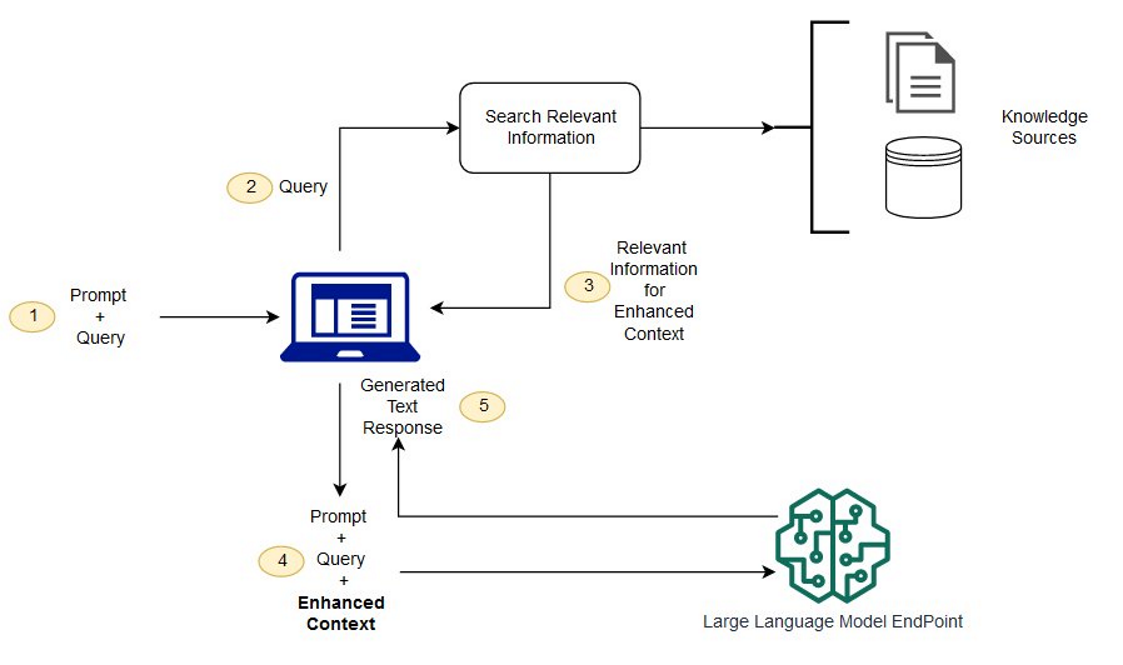

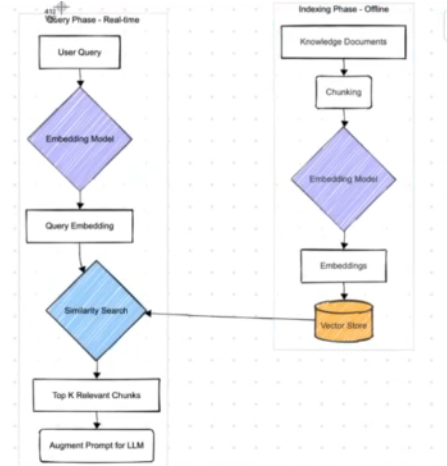

https://www.kaggle.com/code/chunkysuraaj/rags-ml-sys-design